In [1]:
%run functions.ipynb
%run matrix_DFM_class.ipynb
%run PVD_class.ipynb
from numpy.linalg import svd,matrix_rank
%run TRPCA.ipynb

Using numpy backend.


In [2]:
M,R,C,f,P,D,risk=generate_matrix_test_data(20,20,1000)

In [3]:
#generate an example problem: recover L_0 (and C_0) when given M_0
rho = .01   #proportion of corrupted entries
var = 20    #variance of the normal distribution generating the noise
def add_noise(L_0, rho, var):
    S_0 = np.random.binomial(1,rho, L_0.shape)  #affected entries
    N   = np.random.normal(0, var, L_0.shape)   #noise into affected entries
    C_0 = S_0 * N

    return(C_0 + L_0, C_0)

y, C_0 = add_noise(M, rho, var)

In [145]:
true_low_rk=np.einsum('im,jn,mnt->ijt',R,C,f)+np.einsum('im,jn,mnt->ijt',P,D,risk)+np.random.normal(0, 0.0001, y.shape)

In [5]:
model=PVD(L)

In [6]:
model.fit()

In [7]:
trace_stat(np.hstack([P,R]).T,model.left_loading.T)

0.9410908704357994

In [8]:
trace_stat(np.hstack([C,D]).T,model.right_loading.T)

0.9666482698329034

In [9]:
model.left_loading.T.shape

(7, 20)

In [10]:
model.right_loading.T.shape

(5, 20)

In [4]:
TRPCA = TRPCA()
L, E = TRPCA.ADMM(y)

63.889009083570414
7.0710678118654755
3.3743776366585756
2.463813350245677
1.9188176176014853
1.4181512847906363
1.3008204165806445
0.990388552605038
0.895264025584564
0.7787335583009797
0.562096626074152
0.41799949949941617
0.33935818012974917
0.29215858589068744
0.24690744858552216
0.209060994367958
0.15840266647132673
0.12900848954706834
0.10789453822189271
0.09163493410377577
0.07179107247785349
0.05814276727793771
0.04545610917555232
0.034595327430679834
0.02812287063783636
0.02298082237165988
0.019469630342960453
0.015837109892144152
0.013215766964265296
0.011111355905999099
0.00931202616659188
0.007962829863040088
0.007267942207345612
0.006713461633581108
0.006276577045545517
0.005927266738132375
0.005713881195592574
0.005586505369161943
0.00555087632689566
0.005494300119349704
0.00540454938240198
0.005291604935664385
0.005216639641310916
0.0050984277846573
0.004870191404159563
0.004599868512380034
0.004423031314366721
0.004299793734956259
0.004156413007702864
0.0040118873602038

In [77]:
percentage_error(y-C_0,y)
percentage_error(y-C_0,L)

1.962752598408556
0.6452137283166077


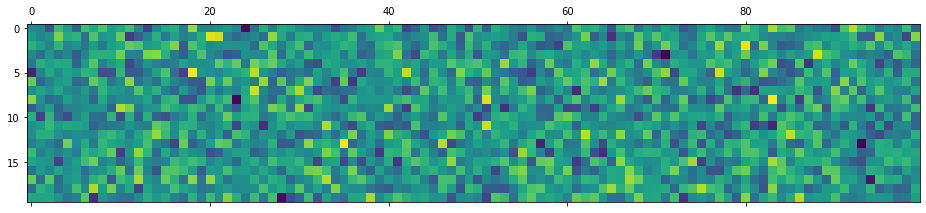

In [63]:
plt.matshow((y-C_0)[0,:,:100])

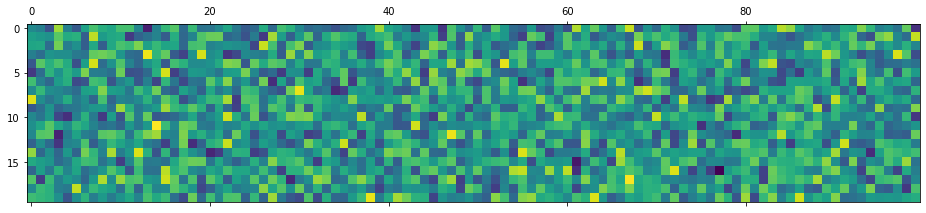

In [78]:
plt.matshow(L[0,:,:100])